In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Datenverständnis und erste Analyse

### Bedeutung der Spalten im Black Friday Dataset 

- `User_ID`: Eindeutige ID für jeden Kunden
- `Product_ID`: Eindeutige ID für jedes Produkt
- `Gender`: M = männlich, F = weiblich
- `Age`: Kategorisierte Altersgruppe (z. B. "26-35")
- `Occupation`: Kategorischer Code für Berufsgruppe (0–20), Bedeutung nicht genau bekannt
- `City_Category`: Stadtklasse
- `Stay_In_Current_City_Years`: Anzahl Jahre in aktueller Stadt ("1", "2", "3", "4+")
- `Marital_Status`: 0 = ledig, 1 = verheiratet
- `Product_Category_1/2/3`: Produktklassifizierungen
- `Purchase`: Kaufbetrag


## 1.1 Anzeigen & Datenimport

In [88]:
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


df = pd.read_csv("train.csv")

## 1.2 Erste Dateninspektion

### a. Struktur des DataFrames

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


### b. Statistischer Übersicht

In [90]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


### c. Spaltennamen

In [91]:
print(df.columns)

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')


### d. Erste Werte (head)

In [92]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## 1.3 Datenprobleme identifizieren

### a. Fehlende Werte

In [93]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

### b. Eindeutige Werte je Spalte

In [94]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

# 2. Datenbereinigung und Feature Engineering

## 2.1 Fehlende Werte behandeln

In [ ]:
df.fillna({"Product_Category_2":0}, inplace=True)
df.fillna({"Product_Category_3":0}, inplace=True)

df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

## 2.2 Konsistenz und Datentypen

### a. Gender umwandeln

In [96]:
df["Gender"] = df["Gender"].map({"F": "Female", "M": "Male"})

### b. Age als Kategorie

In [97]:
df["Age"] = df["Age"].astype("category")

### c. Occupation als Kategorien

In [98]:
df["Occupation"] = df["Occupation"].astype("category")

## 2.3 Feature Engineering

### a. Altersgruppen ordnen

In [99]:
age_order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

### b. Gesamtkaufsumme pro Kunde berechnen

In [100]:
df['Total_Purchase'] = df.groupby('User_ID')['Purchase'].transform('sum')

# 3. Explorative Datenanalyse (EDA)

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

## 3.1 Verteilungen und Häufigkeiten

#### Geschlechterverteilung

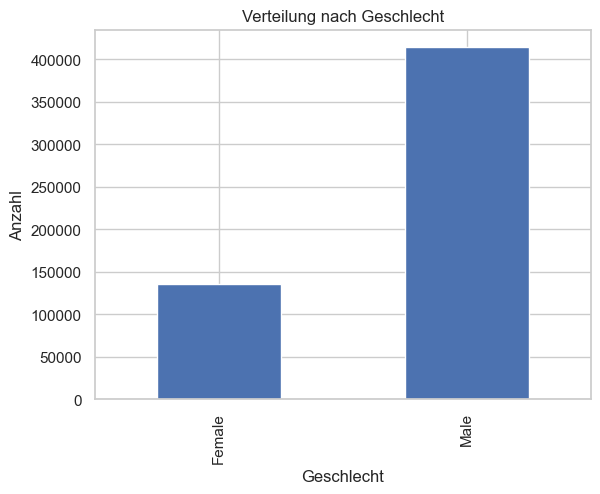

In [102]:
gender_counts = df["Gender"].value_counts().sort_index()
gender_counts.plot(kind='bar')
plt.xlabel('Geschlecht')
plt.ylabel('Anzahl')
plt.title('Verteilung nach Geschlecht')
plt.show()

#### Altersverteilung

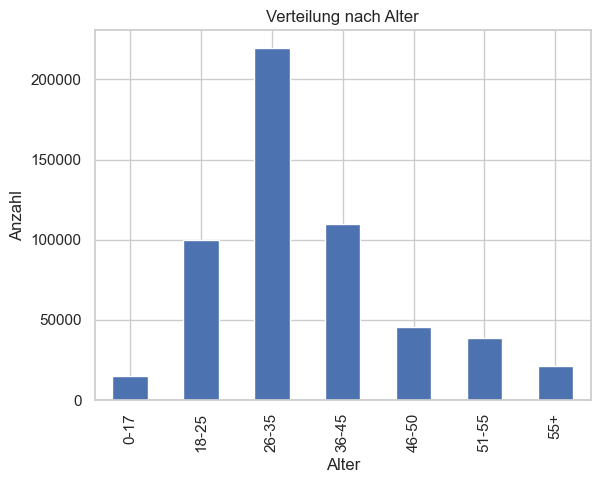

In [103]:
age_counts = df["Age"].value_counts().sort_index()
age_counts.plot(kind='bar')
plt.xlabel('Alter')
plt.ylabel('Anzahl')
plt.title('Verteilung nach Alter')
plt.show()

#### Familienstandsverteilung

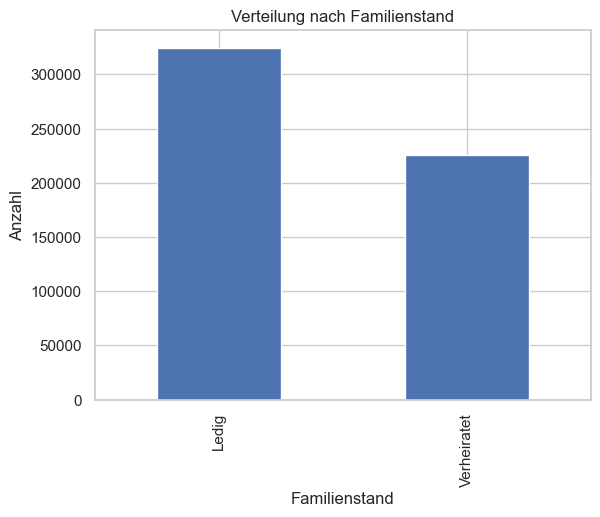

In [104]:
material_counts = df["Marital_Status"].value_counts().sort_index()
material_counts.index = material_counts.index.map({0: "Ledig", 1: "Verheiratet"})
material_counts.plot(kind='bar')
plt.xlabel('Familienstand')
plt.ylabel('Anzahl')
plt.title('Verteilung nach Familienstand')
plt.show()

#### Verteilung der Produktkategorien in Produktkategorie 1

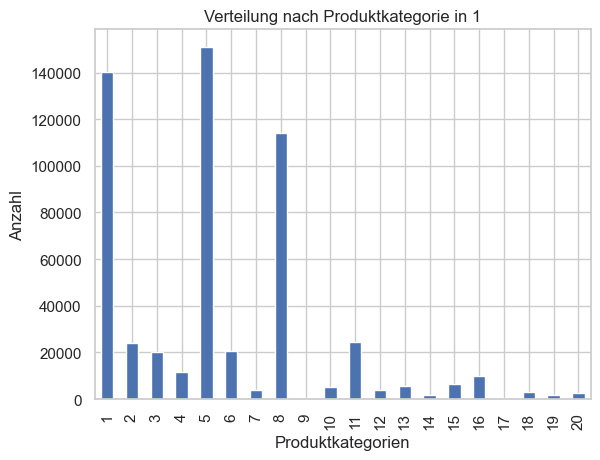

In [105]:
category_counts = df["Product_Category_1"].value_counts().sort_index()
category_counts.plot(kind='bar')
plt.xlabel('Produktkategorien')
plt.ylabel('Anzahl')
plt.title('Verteilung nach Produktkategorie in 1')
plt.show()

#### Verteilung der Berufe

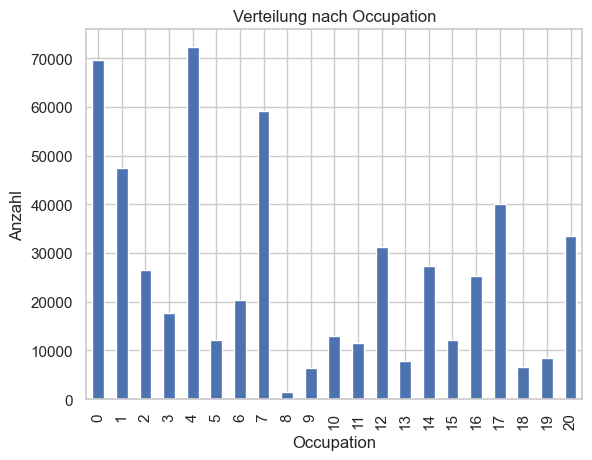

In [106]:
occupation_counts = df["Occupation"].value_counts().sort_index()
occupation_counts.plot(kind='bar')
plt.xlabel('Occupation')
plt.ylabel('Anzahl')
plt.title('Verteilung nach Occupation')
plt.show()

#### Verteilung der Stadtkategorien

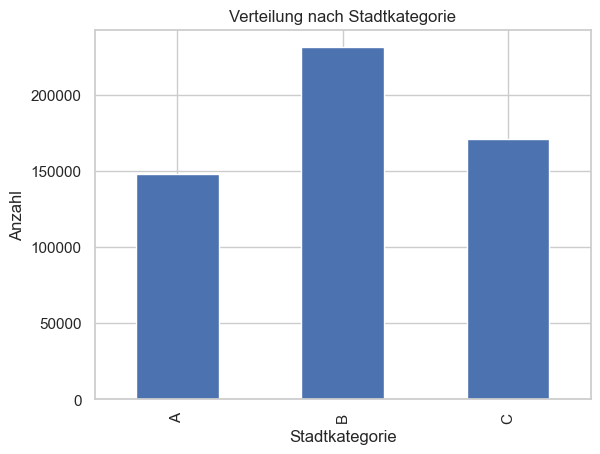

In [107]:
city_counts = df["City_Category"].value_counts().sort_index()
city_counts.plot(kind='bar')
plt.xlabel('Stadtkategorie')
plt.ylabel('Anzahl')
plt.title('Verteilung nach Stadtkategorie')
plt.show()

#### Verteilung des Kaufbetrages

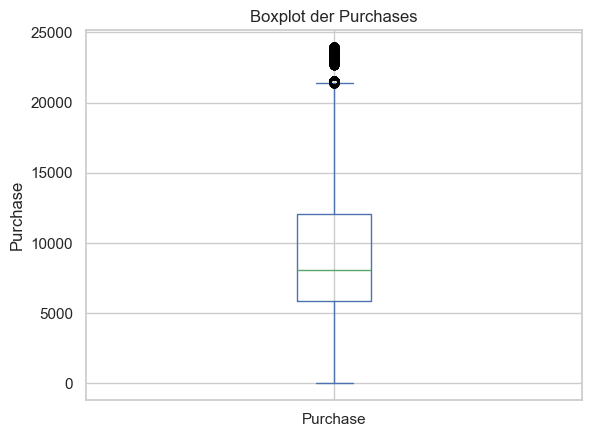

In [108]:
df['Purchase'].plot(kind='box')
plt.title('Boxplot der Purchases')
plt.ylabel('Purchase')
plt.show()

## 3.2 Korrelationen und Zusammenhänge

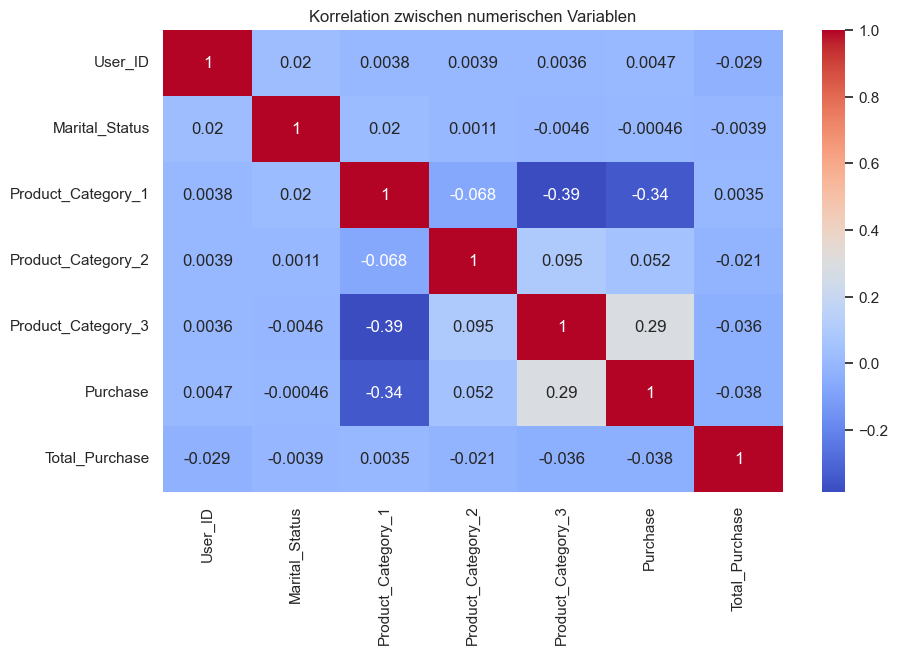

In [109]:
plt.figure(figsize=(10,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Korrelation zwischen numerischen Variablen")
plt.show()

## 3.3 Einflussfaktoren auf Kaufverhalten (2D)

#### Wie hängen Geschlecht und Purchase zusammen?

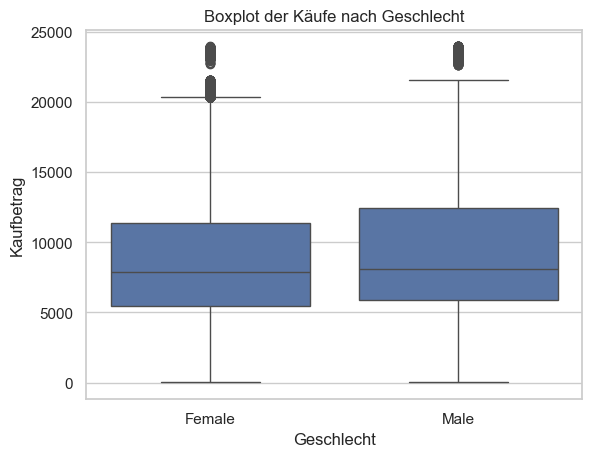

In [110]:
sns.boxplot(x='Gender', y='Purchase', data=df)
plt.title('Boxplot der Käufe nach Geschlecht')
plt.xlabel('Geschlecht')
plt.ylabel('Kaufbetrag')
plt.show()

#### Wie hängen Alter und Purchase zusammen?

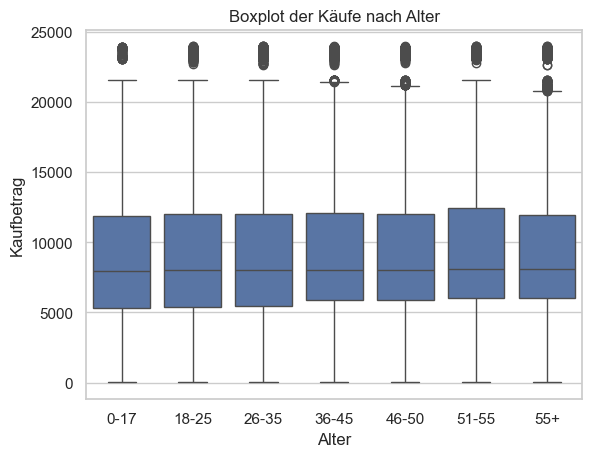

In [111]:
sns.boxplot(x='Age', y='Purchase', data=df)
plt.title('Boxplot der Käufe nach Alter')
plt.xlabel('Alter')
plt.ylabel('Kaufbetrag')
plt.show()

#### Wie hängen Material Status und Purchase zusammen?

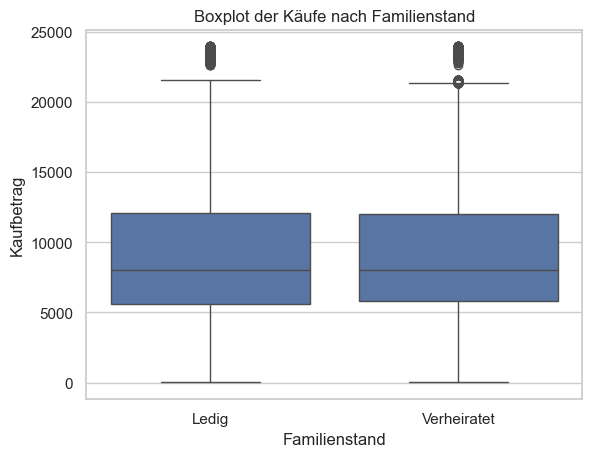

In [112]:
df["Marital_Status"] = df["Marital_Status"].map({0: "Ledig", 1: "Verheiratet"})
sns.boxplot(x='Marital_Status', y='Purchase', data=df)
plt.title('Boxplot der Käufe nach Familienstand')
plt.xlabel('Familienstand')
plt.ylabel('Kaufbetrag')
plt.show()

#### Da hier schwierig zu erkennen: Durchschnittliche Kaufbetrag

In [113]:
df.groupby('Marital_Status')['Purchase'].mean()


Marital_Status
Ledig          9265.907619
Verheiratet    9261.174574
Name: Purchase, dtype: float64

#### Da hier schwierig zu erkennen: Gesamter Kaufbetrag


In [114]:
df.groupby('Marital_Status')['Purchase'].sum()


Marital_Status
Ledig          3008927447
Verheiratet    2086885295
Name: Purchase, dtype: int64

#### Wie hängen Occupation und Purchase zusammen?

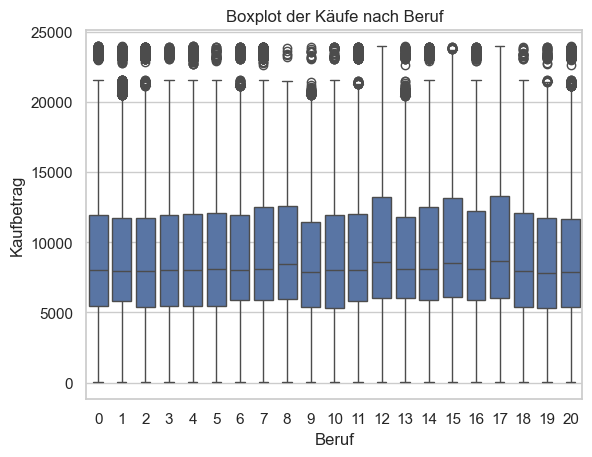

In [115]:
sns.boxplot(x='Occupation', y='Purchase', data=df)
plt.title('Boxplot der Käufe nach Beruf')
plt.xlabel('Beruf')
plt.ylabel('Kaufbetrag')
plt.show()

#### Wie hängen Stadtkategorie und Purchase zusammen?

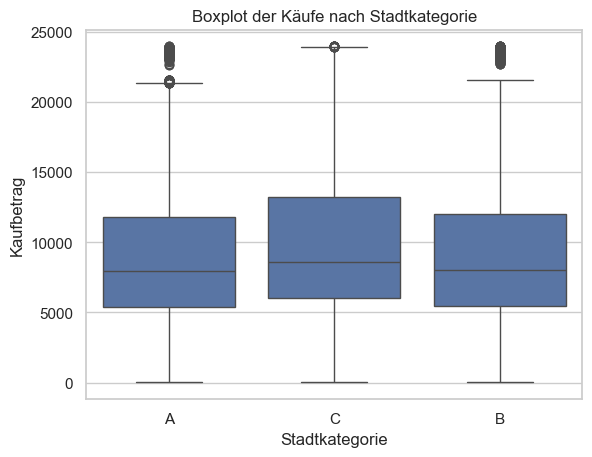

In [116]:
sns.boxplot(x='City_Category', y='Purchase', data=df)
plt.title('Boxplot der Käufe nach Stadtkategorie')
plt.xlabel('Stadtkategorie')
plt.ylabel('Kaufbetrag')
plt.show()

#### Wie hängen Produktkategorie I und Purchase zusammen?

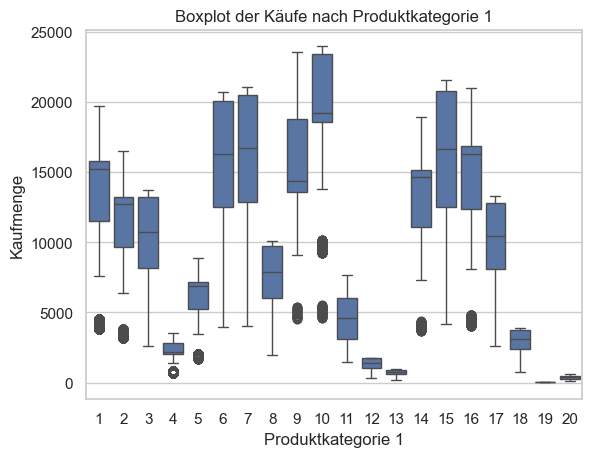

In [117]:
sns.boxplot(x='Product_Category_1', y='Purchase', data=df)
plt.title('Boxplot der Käufe nach Produktkategorie 1')
plt.xlabel('Produktkategorie 1')
plt.ylabel('Kaufmenge')
plt.show()

## 3.3 Kaufverhalten im Zusammenspiel von Variabeln (3D)

### Kaufbetrag Verteilung nach Beruf und Geschlecht

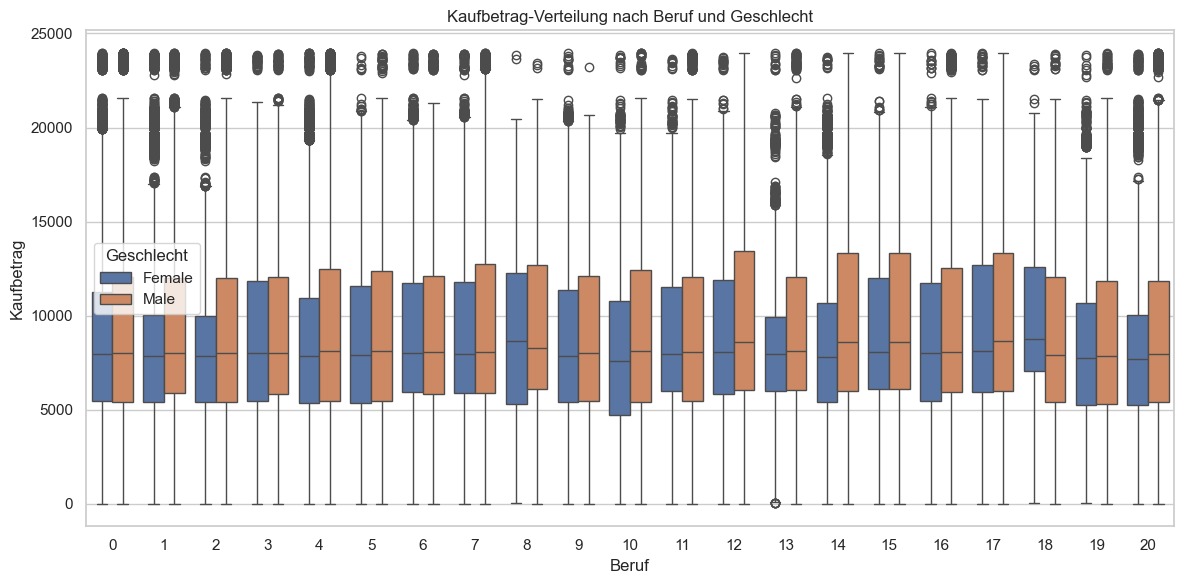

In [118]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Occupation', y='Purchase', hue='Gender')

plt.title('Kaufbetrag-Verteilung nach Beruf und Geschlecht')
plt.xlabel('Beruf')
plt.ylabel('Kaufbetrag')
plt.legend(title='Geschlecht')
plt.tight_layout()
plt.show()

### Kaufbetragverteilung nach Beruf und Familienstand

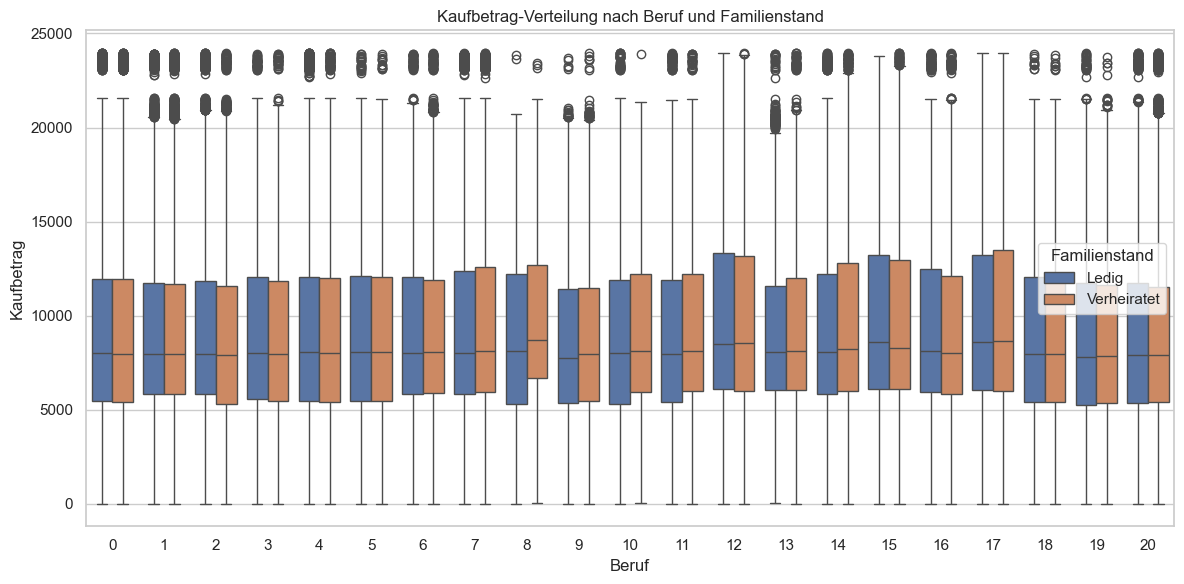

In [119]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Occupation', y='Purchase', hue='Marital_Status')

plt.title('Kaufbetrag-Verteilung nach Beruf und Familienstand')
plt.xlabel('Beruf')
plt.ylabel('Kaufbetrag')
plt.legend(title='Familienstand')
plt.tight_layout()
plt.show()

### Kaufbetragverteilung nach Beruf und Stadtkategorie

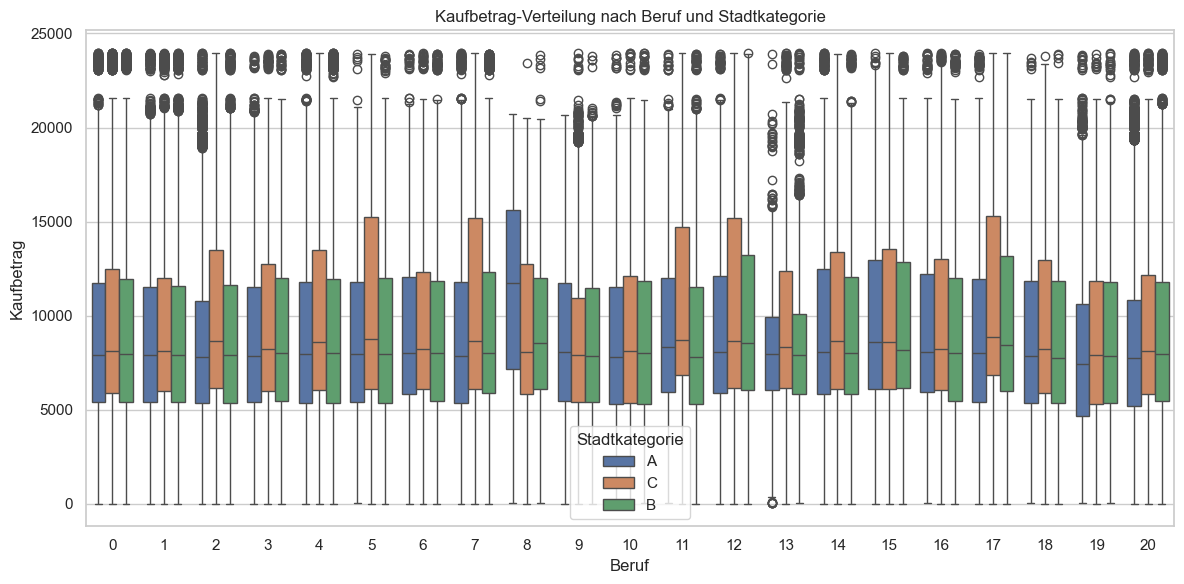

In [120]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Occupation', y='Purchase', hue='City_Category')

plt.title('Kaufbetrag-Verteilung nach Beruf und Stadtkategorie')
plt.xlabel('Beruf')
plt.ylabel('Kaufbetrag')
plt.legend(title='Stadtkategorie')
plt.tight_layout()
plt.show()

### Kaufbetragverteilung nach Produktkategorie 1 und Geschlecht

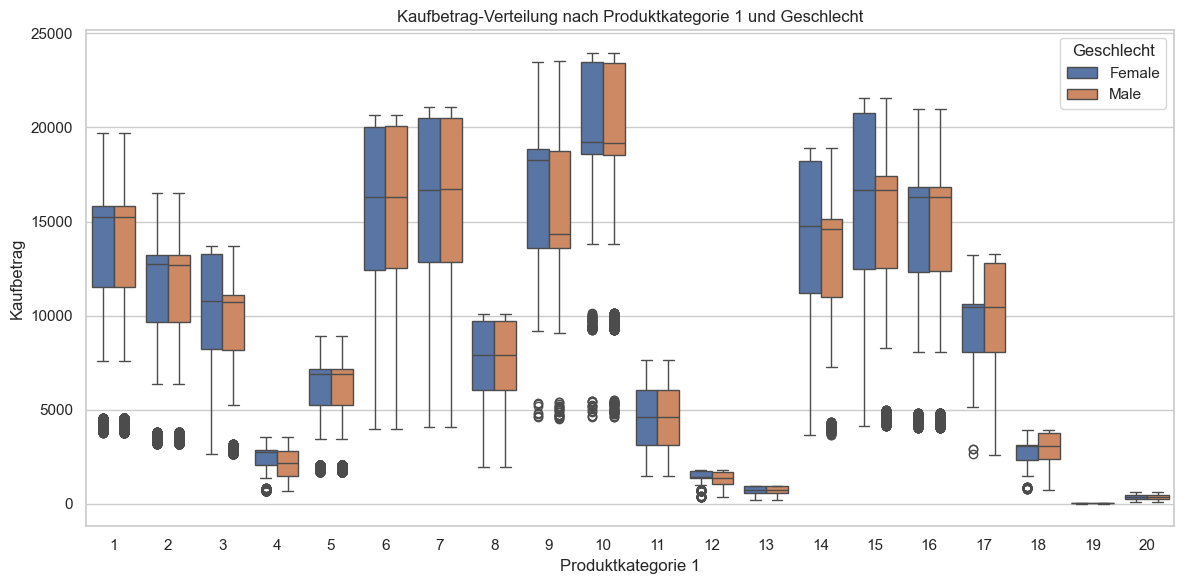

In [121]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Product_Category_1', y='Purchase', hue='Gender')

plt.title('Kaufbetrag-Verteilung nach Produktkategorie 1 und Geschlecht')
plt.xlabel('Produktkategorie 1')
plt.ylabel('Kaufbetrag')
plt.legend(title='Geschlecht')
plt.tight_layout()
plt.show()

### Kaufbetragverteilung nach Produktkategorie 1 und Familienstand

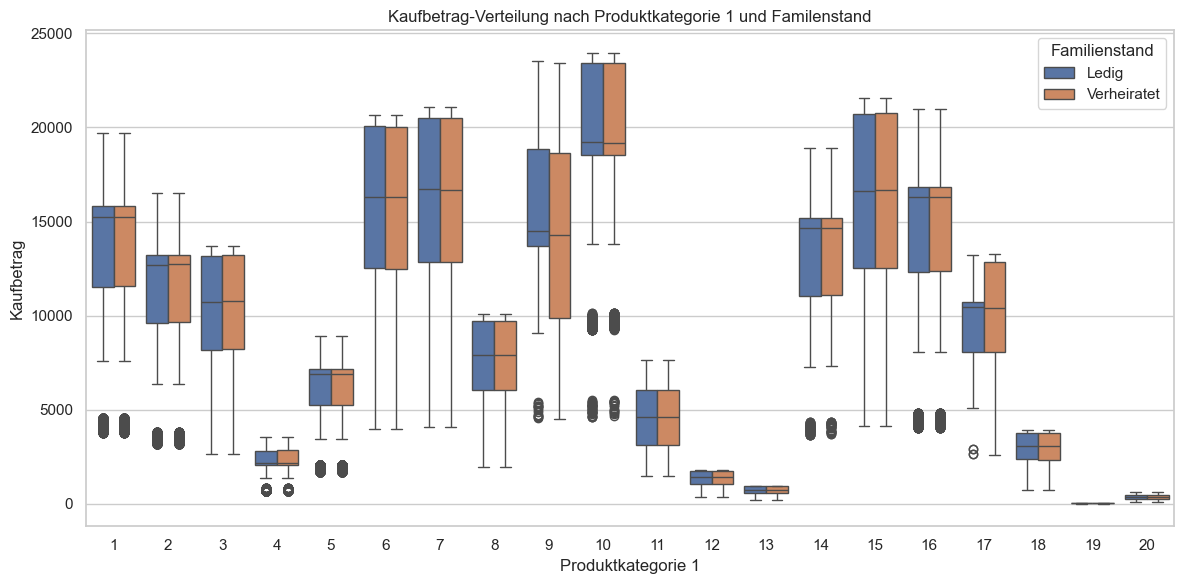

In [122]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Product_Category_1', y='Purchase', hue='Marital_Status')

plt.title('Kaufbetrag-Verteilung nach Produktkategorie 1 und Familenstand')
plt.xlabel('Produktkategorie 1')
plt.ylabel('Kaufbetrag')
plt.legend(title='Familienstand')
plt.tight_layout()
plt.show()

### Kaufbetrag nach Alter und Geschlecht

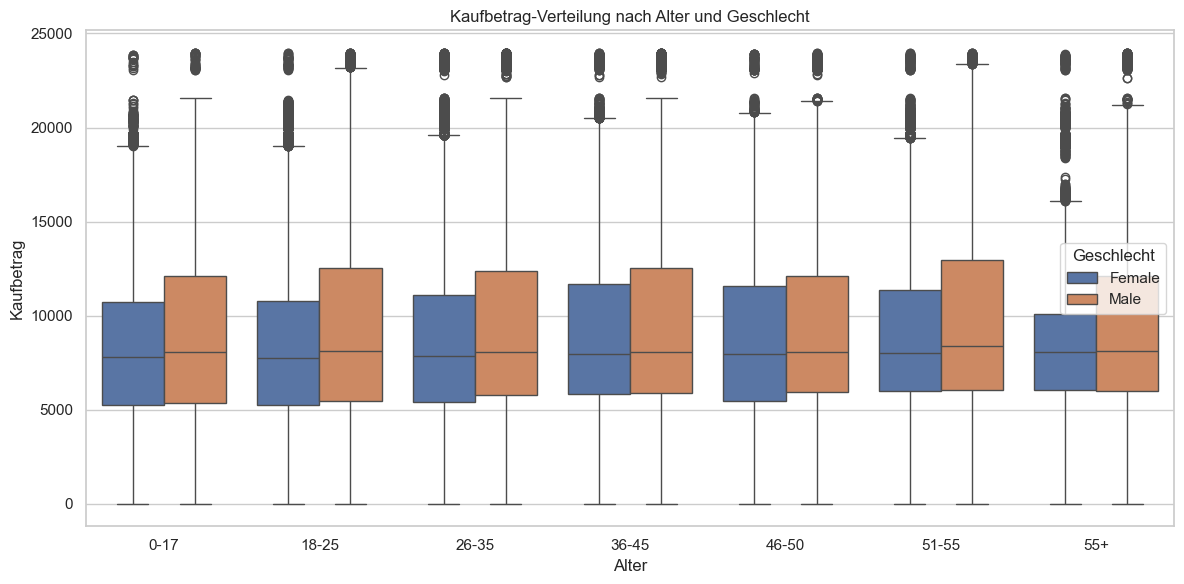

In [123]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Age', y='Purchase', hue='Gender')

plt.title('Kaufbetrag-Verteilung nach Alter und Geschlecht')
plt.xlabel('Alter')
plt.ylabel('Kaufbetrag')
plt.legend(title='Geschlecht')
plt.tight_layout()
plt.show()

### Kaufbetrag nach Alter und Stadtkategorie

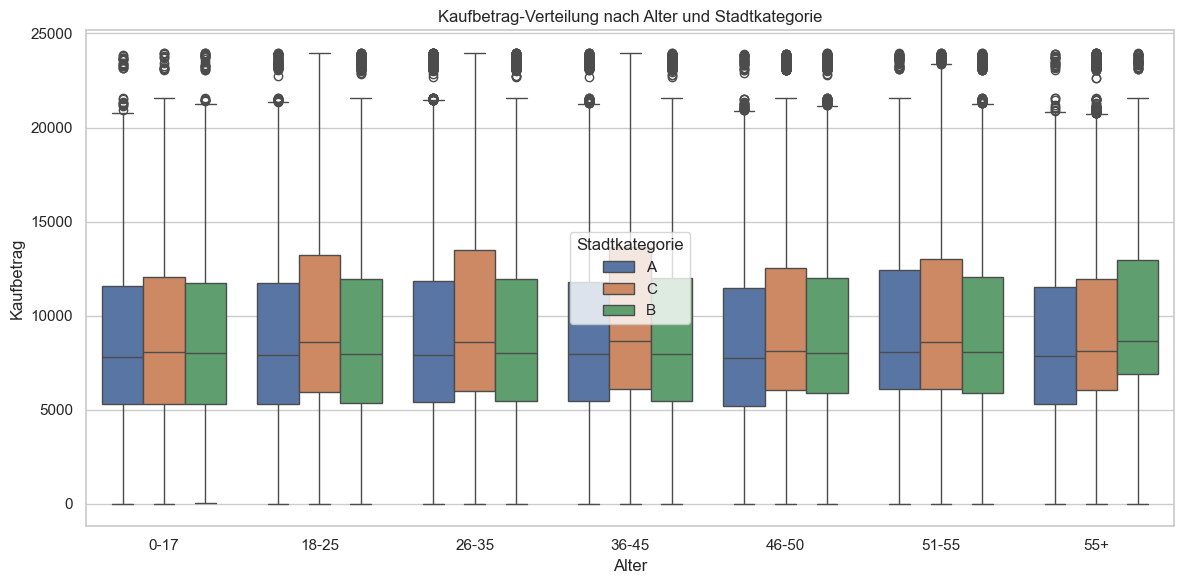

In [124]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Age', y='Purchase', hue='City_Category')

plt.title('Kaufbetrag-Verteilung nach Alter und Stadtkategorie')
plt.xlabel('Alter')
plt.ylabel('Kaufbetrag')
plt.legend(title='Stadtkategorie')
plt.tight_layout()
plt.show()

### Kaufbetrag nach Alter und Familienstand

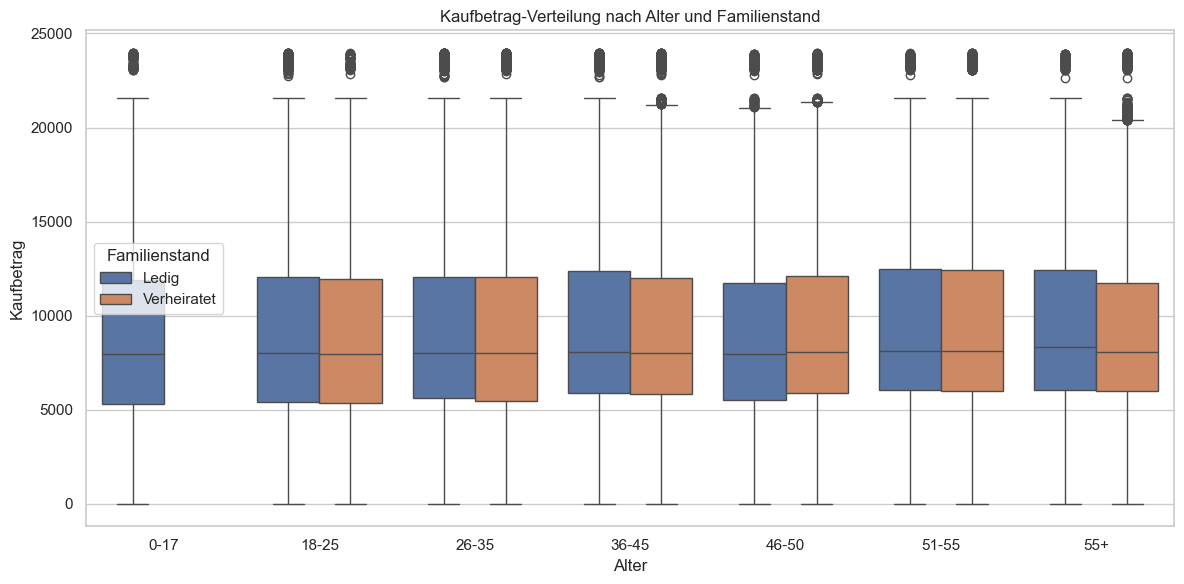

In [125]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Age', y='Purchase', hue='Marital_Status')

plt.title('Kaufbetrag-Verteilung nach Alter und Familienstand')
plt.xlabel('Alter')
plt.ylabel('Kaufbetrag')
plt.legend(title='Familienstand')
plt.tight_layout()
plt.show()

### Kaufbetrag nach Stadtkategorie und Geschlecht

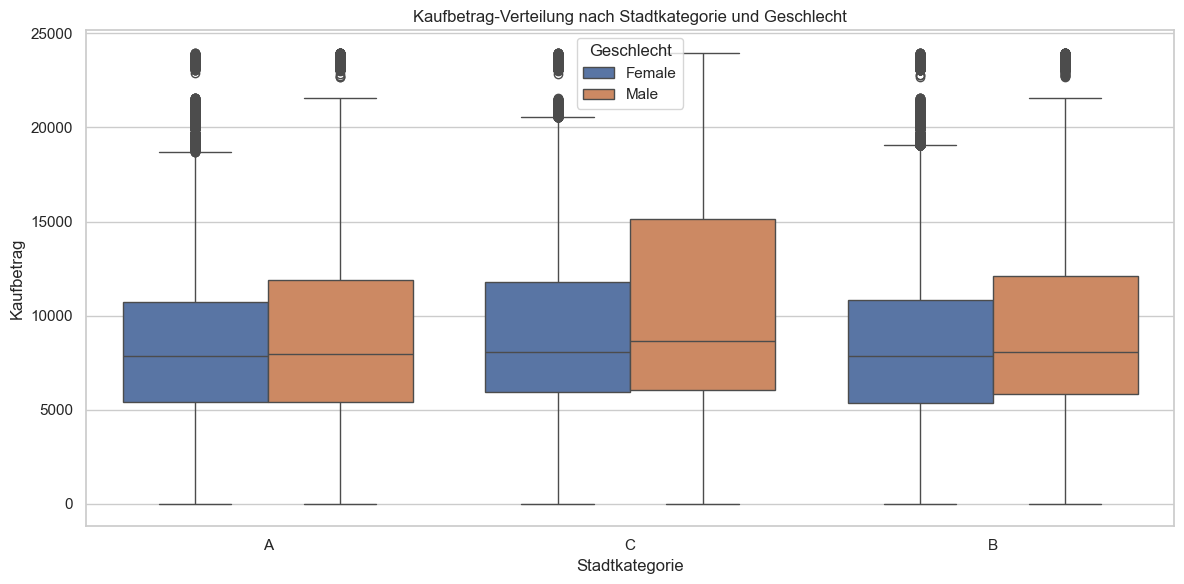

In [126]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='City_Category', y='Purchase', hue='Gender')

plt.title('Kaufbetrag-Verteilung nach Stadtkategorie und Geschlecht')
plt.xlabel('Stadtkategorie')
plt.ylabel('Kaufbetrag')
plt.legend(title='Geschlecht')
plt.tight_layout()
plt.show()

### Kaufbetrag nach Stadtkategorie und Familienstand

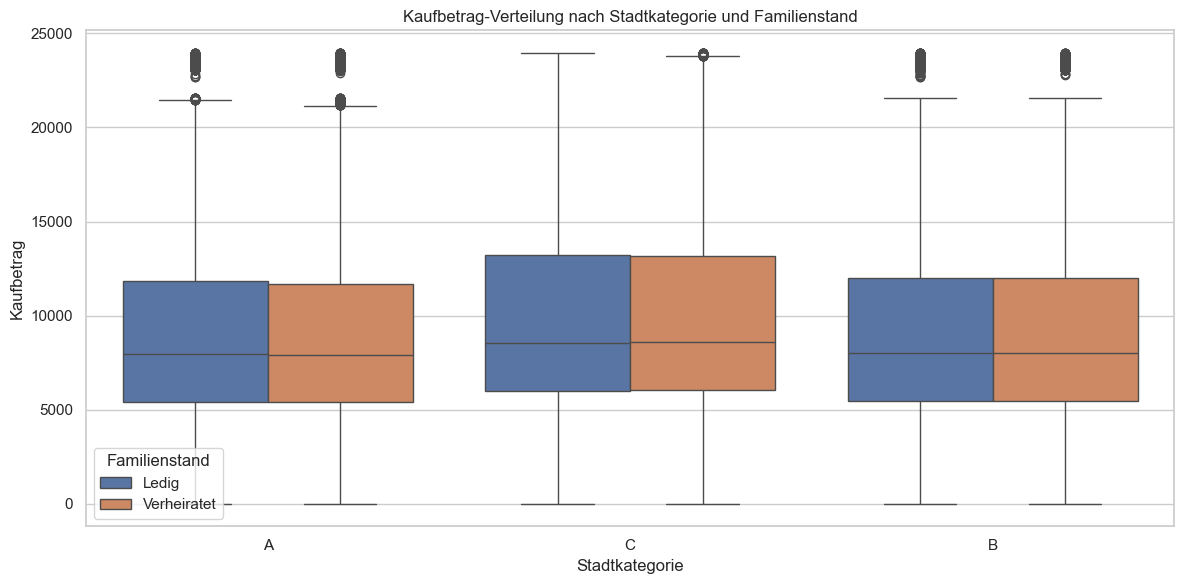

In [127]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='City_Category', y='Purchase', hue='Marital_Status')

plt.title('Kaufbetrag-Verteilung nach Stadtkategorie und Familienstand')
plt.xlabel('Stadtkategorie')
plt.ylabel('Kaufbetrag')
plt.legend(title='Familienstand')
plt.tight_layout()
plt.show()

### Kaufbetrag nach Produktkategorie 1 und Stadtkategorie

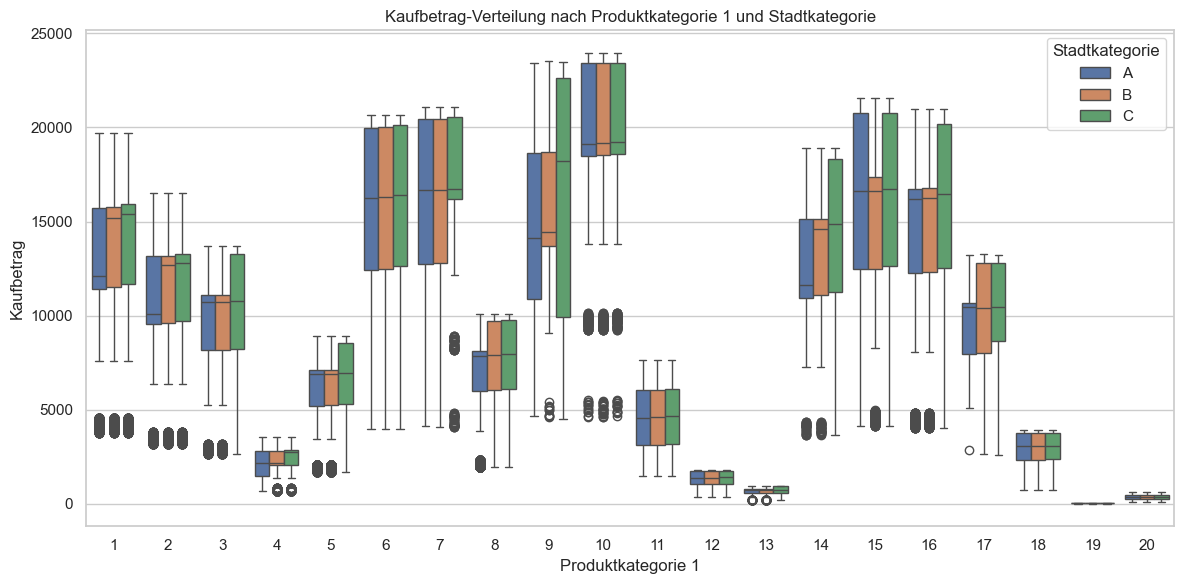

In [128]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Product_Category_1', y='Purchase', hue='City_Category')

plt.title('Kaufbetrag-Verteilung nach Produktkategorie 1 und Stadtkategorie')
plt.xlabel('Produktkategorie 1')
plt.ylabel('Kaufbetrag')
plt.legend(title='Stadtkategorie')
plt.tight_layout()
plt.show()

### Kaufbetrag nach Geschlecht und Familienstand

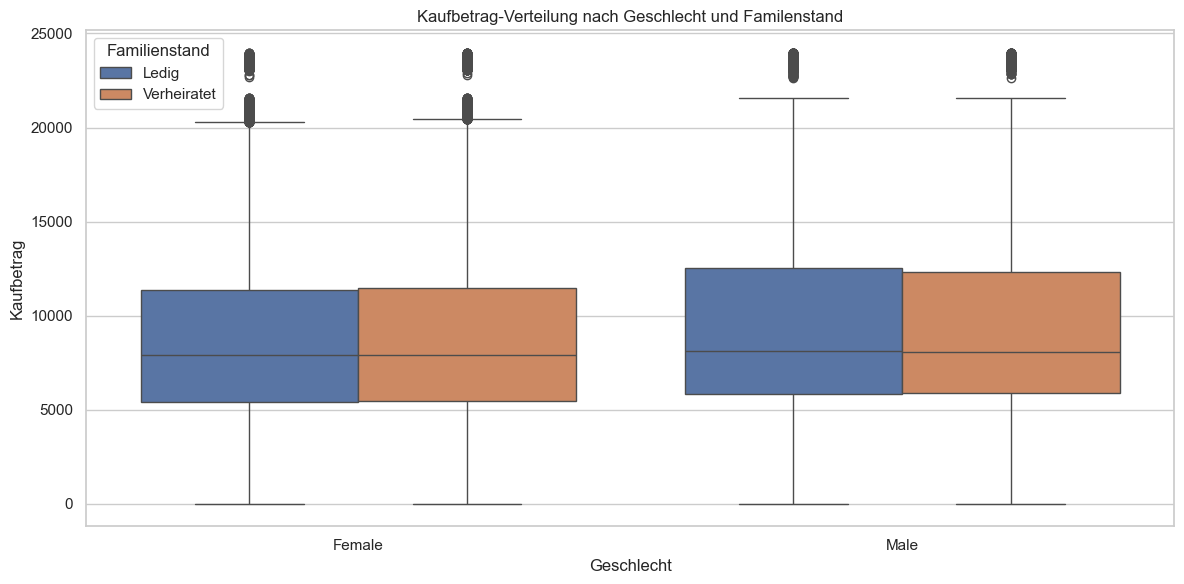

In [129]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Gender', y='Purchase', hue='Marital_Status')

plt.title('Kaufbetrag-Verteilung nach Geschlecht und Familenstand')
plt.xlabel('Geschlecht')
plt.ylabel('Kaufbetrag')
plt.legend(title='Familienstand')
plt.tight_layout()
plt.show()